In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import argparse
import imutils
import glob

In [44]:
cardimages = os.listdir('get61imgs')

In [45]:
cardimages

['7C.png',
 '9H.png',
 '8H.png',
 '7D.png',
 '7S.png',
 '14H.png',
 '11C.png',
 '10D.png',
 '10S.png',
 '13H.png',
 '11D.png',
 '12H.png',
 '11S.png',
 '10C.png',
 '13C.png',
 '11H.png',
 '12S.png',
 '12D.png',
 '13S.png',
 '10H.png',
 '13D.png',
 '12C.png',
 '9C.png',
 '7H.png',
 '14S.png',
 '14D.png',
 '8S.png',
 '8D.png',
 '14C.png',
 '9S.png',
 '9D.png',
 '8C.png']

In [2]:
image = cv2.imread("2card_test.png")
template = cv2.imread("14D.png")
result = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
StartButtonLocation = np.unravel_index(result.argmax(),result.shape)

In [3]:
StartButtonLocation

(289, 93)

In [4]:
result

array([[ 0.00605362,  0.00609467,  0.01285273, ...,  0.0161297 ,
         0.01432026,  0.01905571],
       [ 0.00693472,  0.00711264,  0.01365975, ...,  0.01535062,
         0.01381254,  0.01966532],
       [ 0.00235903,  0.00301902,  0.01048103, ...,  0.01072295,
         0.00860574,  0.01546129],
       ...,
       [-0.02470119, -0.02453469, -0.02417149, ...,  0.0010417 ,
        -0.00061921,  0.00534729],
       [-0.02762276, -0.02744703, -0.0271213 , ...,  0.00576429,
         0.00368011,  0.0094013 ],
       [-0.03066603, -0.03052   , -0.03020165, ...,  0.00856894,
         0.00620128,  0.01181018]], dtype=float32)

In [5]:
def find_image(im, tpl):
    im = np.atleast_3d(im)
    tpl = np.atleast_3d(tpl)
    H, W, D = im.shape[:3]
    h, w = tpl.shape[:2]

    # Integral image and template sum per channel
    sat = im.cumsum(1).cumsum(0)
    tplsum = np.array([tpl[:, :, i].sum() for i in range(D)])

    # Calculate lookup table for all the possible windows
    iA, iB, iC, iD = sat[:-h, :-w], sat[:-h, w:], sat[h:, :-w], sat[h:, w:] 
    lookup = iD - iB - iC + iA
    # Possible matches
    possible_match = np.where(np.logical_and.reduce([lookup[..., i] == tplsum[i] for i in range(D)]))

    # Find exact match
    for y, x in zip(*possible_match):
        if np.all(im[y+1:y+h+1, x+1:x+w+1] == tpl):
            return (y+1, x+1)

    raise Exception("Image not found")

In [6]:
find_image(image, template)

Exception: Image not found

In [ ]:
from skimage import data, color

In [8]:
im = color.gray2rgb(data.coins())
tpl = im[170:220, 75:130].copy()

In [9]:
im = cv2.imread('2card_test.png')
tpl = im[283:329, 449:488].copy()
tpl1 = cv2.imread('10S.png')

In [10]:
y, x = find_image(im, tpl)

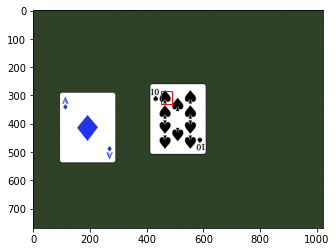

In [11]:
fig, ax = plt.subplots()
plt.imshow(im)
rect = ptch.Rectangle((x, y), tpl.shape[1], tpl.shape[0], edgecolor='r', facecolor='none')
ax.add_patch(rect)

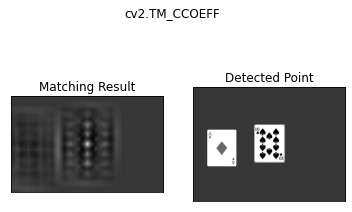

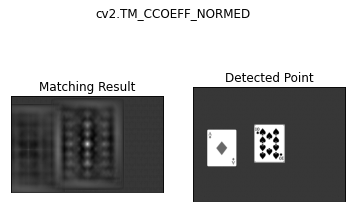

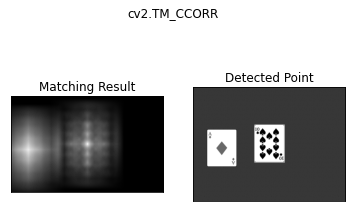

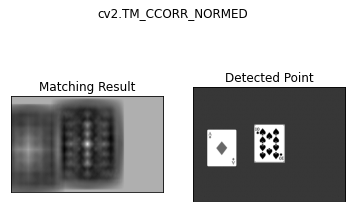

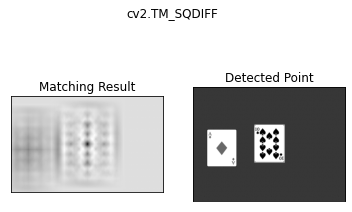

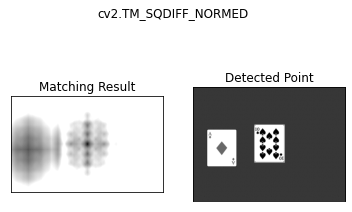

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('2card_test.png',0)
img2 = img.copy()
template = cv2.imread('10S.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [79]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('2Card_test.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('10S.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img_rgb)


True

In [81]:
cv2.imwrite('tester.png', img_gray)

True

In [39]:
if any(map(len, loc)):
    print('yes')

In [75]:

cards = []
for i in cardimages:
    img_rgb = cv2.imread('2card_test.png')
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread('get61imgs/{}'.format(i),0)
    w, h = template.shape[::-1]

    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.95
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
    #cv2.imwrite('res{}.png'.format(i),img_rgb)
    if any(map(len, loc)):
        cards.append(i)
        cv2.imwrite('found_cards/res{}.png'.format(i),img_rgb)
    


In [76]:
cards

['10S.png', '14D.png']

In [74]:
i = '11C.png'
print('/get61imgs/{}'.format(i))

/get61imgs/11C.png


In [94]:
cards = []
for scale in np.linspace(0.2, 1, 10):
    
    img_rgb = cv2.imread('webhandsample1.png')
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread('get61imgs/8C.png',0)
    w, h = template.shape[::-1]

    resized = imutils.resize(img_gray, width = int(img_gray.shape[1] * scale))

    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.95
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    #cv2.imwrite('res{}.png'.format(i),img_rgb)
    if any(map(len, loc)):
        cards.append(scale)
        cv2.imwrite('found_cards/res{}.png'.format(scale),img_rgb)

In [91]:
resized

array([[20, 20, 20, ..., 20, 20, 20],
       [ 4,  4,  4, ...,  4,  4,  4],
       [ 0,  0,  0, ...,  0,  0,  1],
       ...,
       [ 0,  6, 31, ..., 36, 32, 27],
       [ 6, 19, 20, ..., 20, 20, 20],
       [ 4,  4,  4, ...,  4,  4,  4]], dtype=uint8)

In [95]:
cards

[]

In [92]:
# Read the main image 
img_rgb = cv2.imread('webhandsample1.png') 
   
# Convert to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 
# Read the template 
template = cv2.imread('10S.png',0) 
   
# Store width and height of template in w and h 
w, h = template.shape[::-1] 
found = None
  
for scale in np.linspace(0.2, 1.0, 20)[::-1]: 
  
    # resize the image according to the scale, and keep track 
    # of the ratio of the resizing 
    resized = imutils.resize(img_gray, width = int(img_gray.shape[1] * scale)) 
    r = img_gray.shape[1] / float(resized.shape[1]) 
   
    # if the resized image is smaller than the template, then break 
    # from the loop 
    # detect edges in the resized, grayscale image and apply template  
    # matching to find the template in the image edged  
    # = cv2.Canny(resized, 50, 200) result = cv2.matchTemplate(edged, template, 
    # cv2.TM_CCOEFF) (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result) 
    # if we have found a new maximum correlation value, then update 
    # the found variable if found is None or maxVal > found[0]: 
    if resized.shape[0] < h or resized.shape[1] < w: 
            break
    found = (maxVal, maxLoc, r) 
   
# unpack the found varaible and compute the (x, y) coordinates 
# of the bounding box based on the resized ratio 
(_, maxLoc, r) = found 
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r)) 
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r)) 
  
# draw a bounding box around the detected result and display the image 
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2) 
cv2.imshow("Image", image) 
cv2.waitKey(0) 

NameError: name 'maxVal' is not defined

In [1]:
import imutils
import cv2
import numpy as np
#Open template and get canny
template = cv2.imread('get61imgs/8C.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 10, 25)
(height, width) = template.shape[:2]
#open the main image and convert it to gray scale image
main_image = cv2.imread('narrowtestimage.png')
gray_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
temp_found = None
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
   #resize the image and store the ratio
   resized_img = imutils.resize(gray_image, width = int(gray_image.shape[1] * scale))
   ratio = gray_image.shape[1] / float(resized_img.shape[1])
   if resized_img.shape[0] < height or resized_img.shape[1] < width:
      break
   #Convert to edged image for checking
   e = cv2.Canny(resized_img, 10, 25)
   match = cv2.matchTemplate(e, template, cv2.TM_CCOEFF)
   (_, val_max, _, loc_max) = cv2.minMaxLoc(match)
   if temp_found is None or val_max>temp_found[0]:
      temp_found = (val_max, loc_max, ratio)
#Get information from temp_found to compute x,y coordinate
(_, loc_max, r) = temp_found
(x_start, y_start) = (int(loc_max[0]), int(loc_max[1]))
(x_end, y_end) = (int((loc_max[0] + width)), int((loc_max[1] + height)))
#Draw rectangle around the template
cv2.rectangle(main_image, (x_start, y_start), (x_end, y_end), (153, 22, 0), 5)
cv2.imshow('Template Found', main_image)
cv2.waitKey(0)

TypeError: cannot unpack non-iterable NoneType object